### 逻辑回归
<img src="../img/18.png" width="500" align="left"/>

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

<img src="../img/19.png" width="500" align="left"/>

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

<img src="../img/20.png" width="500" align="left"/>

### 实现Logistic 回归

In [1]:
import numpy as np

In [2]:
class LogisticRegression():
    def __init__(self):
        self._W = None
        self.coef_ = None
        self.intercept_ = None

    def _sigmoid(self, t):
        return 1. / (1. + np.exp(-t))

    def accuracy_score(self, y_true, y_predict):
        return np.sum(y_true == y_predict) / len(y_true)

    def fit(self, X, y, eta=0.01, epsilon=1e-8, n_iters=1e4):
        def J(W, X_b, y):
            y_hat = self._sigmoid(X_b.dot(W))
            try:
                return np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)) / len(y)
            except:
                return float('inf')

        def dJ(W, X_b, y):
            return X_b.T.dot(self._sigmoid(X_b.dot(W)) - y) / len(X_b)

        # 特征向量补1
        X_b = np.hstack([np.ones((len(X), 1)), X])
        # 初始化系数
        W = np.zeros(X_b.shape[1])

        i_iter = 0
        while i_iter < n_iters:
            grad = dJ(W, X_b, y)
            last_W = W
            W = W - eta * grad
            if (abs(J(W, X_b, y) - J(last_W, X_b, y)) < epsilon):
                break
            i_iter += 1
        self._W = W
        self.coef_ = W[1:]
        self.intercept_ = W[0]

    def predict_proba(self, X_predict):
        X_b = np.hstack([np.ones((len(X_predict), 1)), X_predict])
        return self._sigmoid(X_b.dot(self._W))

    def predict(self, X_predict):
        proba = self.predict_proba(X_predict)
        return np.array(proba >= 0.5, dtype='int')

    def score(self, X_test, y_test):
        y_predict = self.predict(X_test)
        return self.accuracy_score(y_test, y_predict)

In [3]:
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

In [4]:
X = iris.data
y = iris.target

In [5]:
'''
因为逻辑回归只能处理二分类问题，而iris数据集有三类，所以我们先精简一下只保留两个标签并且为了方便可视化我们先只取前两个特征
'''
X = X[np.logical_or(y==0,y==1),:2]
y = y[np.logical_or(y==0,y==1)]

'\n因为逻辑回归只能处理二分类问题，而iris数据集有三类，所以我们先精简一下只保留两个标签并且为了方便可视化我们先只取前两个特征\n'

(100, 2)

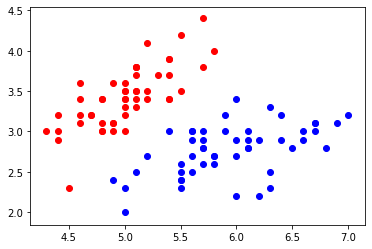

In [6]:
X.shape
plt.scatter(X[y==0,0],X[y==0,1] ,color='red')
plt.scatter(X[y==1,0],X[y==1,1] ,color='blue')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=666)

In [8]:
'''
使用逻辑回归
'''
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train,y_train)

'\n使用逻辑回归\n'

In [9]:
logistic_reg.score(X_test,y_test)

1.0

In [10]:
logistic_reg.coef_
logistic_reg.intercept_
logistic_reg.predict_proba(X_test)

array([ 3.01796521, -5.04447145])

-0.6937719272911225

array([0.92972035, 0.98664939, 0.14852024, 0.01685947, 0.0369836 ,
       0.0186637 , 0.04936918, 0.99669244, 0.97993941, 0.74524655,
       0.04473194, 0.00339285, 0.26131273, 0.0369836 , 0.84192923,
       0.79892262, 0.82890209, 0.32358166, 0.06535323, 0.20735334])

## 决策边界

<img src="../img/21.png" width="500" align="left"/>

In [11]:
def x2(x1):
    return (-logistic_reg.coef_[0] * x1 - logistic_reg.intercept_) / logistic_reg.coef_[1]

In [12]:
x1_polt = np.linspace(4,8,1000)
x2_plot = x2(x1_polt)

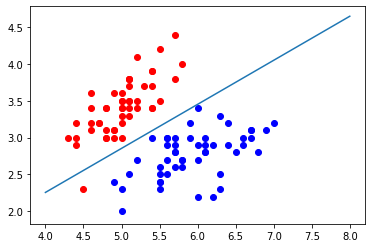

In [13]:
plt.plot(x1_polt,x2_plot)
plt.scatter(X[y==0,0],X[y==0,1] ,color='red')
plt.scatter(X[y==1,0],X[y==1,1] ,color='blue')
plt.show()

### 不规则决策边界的绘制

/Users/zc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


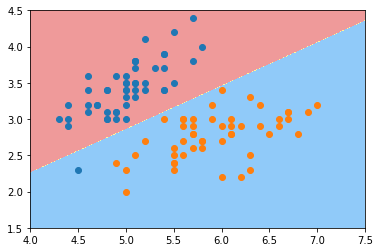

In [14]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)
    
plot_decision_boundary(logistic_reg, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### KNN 决策边界

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [16]:
knn_clf.score(X_test,y_test)

1.0

/Users/zc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


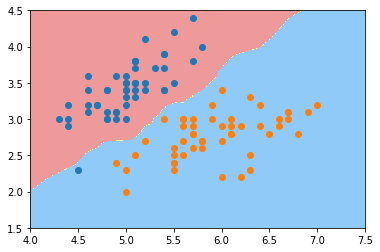

In [17]:
plot_decision_boundary(knn_clf, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [18]:
'''
测试对全部数据进行KNN分类
'''
knn_clf_all = KNeighborsClassifier()
knn_clf_all.fit(iris.data[:,:2],iris.target)

'\n测试对全部数据进行KNN分类\n'

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

/Users/zc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


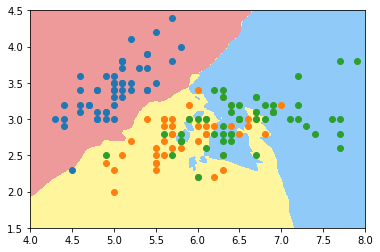

In [19]:
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])
plt.show()

In [20]:
knn_clf_all = KNeighborsClassifier(n_neighbors=50)
knn_clf_all.fit(iris.data[:,:2],iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=50, p=2,
           weights='uniform')

/Users/zc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


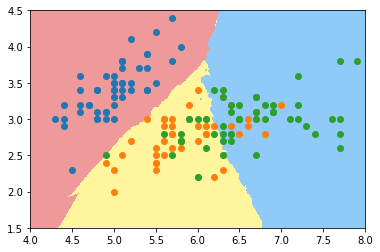

In [21]:
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])
plt.show()